# Are Earthquakes predictable?

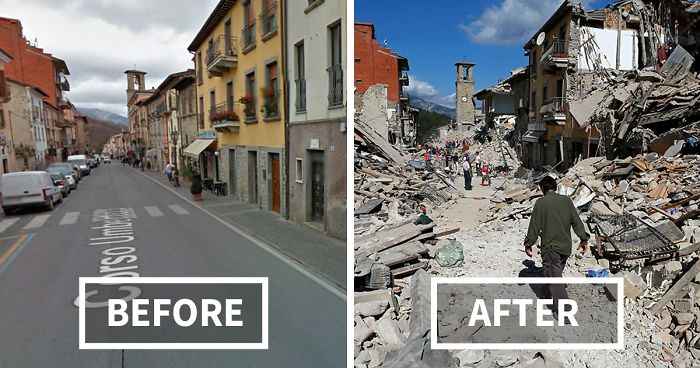

In [1]:
from IPython.display import Image
Image('/home/work/Desktop/italy-earthquake-before-after-fb__700-png.jpg')

## Import library / Organize data / EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from folium import plugins
from folium.plugins import MarkerCluster
import matplotlib.mlab as mlab
import math
from scipy.stats import ttest_1samp
from statsmodels.stats.proportion import proportions_ztest
% matplotlib inline

In [3]:
earthquakes=pd.read_csv('/home/work/gU_files/Earthquakes_USGS/database.csv')

In [4]:
earthquakes.head(n=3)

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type    ...      \
0                     NaN        6.0             MW    ...       
1                     NaN        5.8             MW    ...       
2                     NaN        6.2             MW    ...       

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                         NaN            NaN                  NaN   
2                         NaN            NaN                  NaN   

   Horizontal Error  Root Mean Square            ID  Source Location Source  \
0               NaN               NaN  ISCGEM860706  ISCGEM          ISCGEM   
1               NaN               NaN  ISCGEM860737  ISCGEM          ISCGEM   
2               NaN               NaN  ISCGEM860762  ISCGEM          ISCGEM   

  Magnitude Source     Status  
0           ISCGEM  Automatic  
1           ISCGEM  Automatic  
2           ISCGEM  Automatic  

[3 rows x 21 columns]

In [5]:
earthquakes.describe()

## explaing the sigificance with each catagory

Latitude     Longitude         Depth  Depth Error  \
count  23412.000000  23412.000000  23412.000000  4461.000000   
mean       1.679033     39.639961     70.767911     4.993115   
std       30.113183    125.511959    122.651898     4.875184   
min      -77.080000   -179.997000     -1.100000     0.000000   
25%      -18.653000    -76.349750     14.522500     1.800000   
50%       -3.568500    103.982000     33.000000     3.500000   
75%       26.190750    145.026250     54.000000     6.300000   
max       86.005000    179.998000    700.000000    91.295000   

       Depth Seismic Stations     Magnitude  Magnitude Error  \
count             7097.000000  23412.000000       327.000000   
mean               275.364098      5.882531         0.071820   
std                162.141631      0.423066         0.051466   
min                  0.000000      5.500000         0.000000   
25%                146.000000      5.600000         0.046000   
50%                255.000000      5.700000         0.059000   
75%                384.000000      6.000000         0.075500   
max                934.000000      9.100000         0.410000   

       Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
count                 2564.000000    7299.000000          1604.000000   
mean                    48.944618      44.163532             3.992660   
std                     62.943106      32.141486             5.377262   
min                      0.000000       0.000000             0.004505   
25%                     10.000000      24.100000             0.968750   
50%                     28.000000      36.000000             2.319500   
75%                     66.000000      54.000000             4.724500   
max                    821.000000     360.000000            37.874000   

       Horizontal Error  Root Mean Square  
count       1156.000000      17352.000000  
mean           7.662759          1.022784  
std           10.430396          0.188545  
min            0.085000          0.000000  
25%            5.300000          0.900000  
50%            6.700000          1.000000  
75%            8.100000          1.130000  
max           99.000000          3.440000

## Descriptive stats

In [6]:
earthquake_sample=earthquakes.sample(1000) #Took a sample of 1000

In [7]:
earthquake_sample.describe()

Latitude    Longitude        Depth  Depth Error  \
count  1000.000000  1000.000000  1000.000000   177.000000   
mean      3.707453    50.384278    68.840542     4.783147   
std      29.422139   122.501324   119.407982     4.564175   
min     -63.561000  -179.984000    -0.097000     0.000000   
25%     -15.879000   -71.223500    14.150000     1.800000   
50%      -2.327000   121.458000    33.000000     3.300000   
75%      29.783250   146.884750    52.000000     6.000000   
max      79.648000   179.948000   675.600000    31.610000   

       Depth Seismic Stations    Magnitude  Magnitude Error  \
count              305.000000  1000.000000        13.000000   
mean               274.281967     5.896950         0.079923   
std                166.925012     0.439807         0.044224   
min                  0.000000     5.500000         0.035000   
25%                137.000000     5.600000         0.057000   
50%                243.000000     5.700000         0.062000   
75%                391.000000     6.100000         0.083000   
max                756.000000     8.300000         0.188000   

       Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
count                  112.000000     313.000000            64.000000   
mean                    51.375000      45.515016             4.014180   
std                     68.645338      37.010769             5.527782   
min                      0.000000       8.700000             0.043000   
25%                     14.000000      23.100000             1.077250   
50%                     28.500000      36.000000             2.594500   
75%                     63.000000      54.200000             4.495000   
max                    505.000000     313.000000            32.416000   

       Horizontal Error  Root Mean Square  
count         40.000000        744.000000  
mean           8.158750          1.019148  
std           14.965896          0.188613  
min            0.200000          0.178000  
25%            4.200000          0.900000  
50%            5.650000          1.000000  
75%            7.525000          1.130000  
max           99.000000          1.500000

In [8]:
ESMagMean=earthquake_sample.Magnitude.mean()
f"{ESMagMean:.2}" # the mean

'5.9'

In [9]:
ESMagMin=earthquake_sample.Magnitude.min()
f'{ESMagMin:.2}' # the lowest range

'5.5'

In [10]:
ESMagMax=earthquake_sample.Magnitude.max()
f'{ESMagMax:.2}' # the highest range

'8.3'

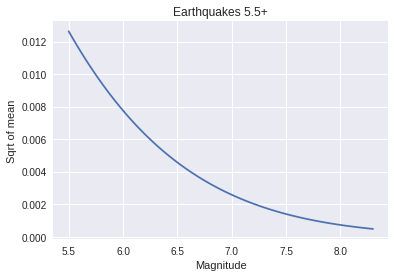

In [20]:
variance = ESMagMean
sigma = math.sqrt(variance)
x = np.linspace(ESMagMin,ESMagMax,100)
plt.title('Earthquakes 5.5+'),
plt.ylabel('Sqrt of mean'),
plt.xlabel('Magnitude'),
plt.plot(x,mlab.normpdf(x,0,sigma)); # hoping to get a normal distrabution curve

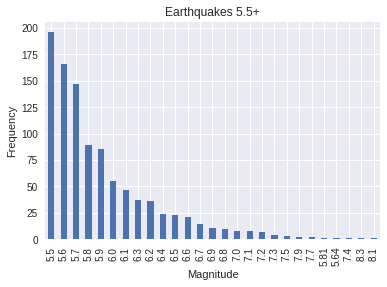

In [66]:
ESM_count=earthquake_sample.Magnitude.value_counts()
ESM_count.plot(kind='bar');
plt.title('Earthquakes 5.5+'),
plt.ylabel('Frequency'),
plt.xlabel('Magnitude'),;


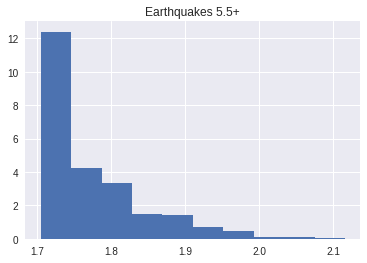

In [77]:
np.log(earthquake_sample.Magnitude).hist(normed=True)
plt.title('Earthquakes 5.5+');


#### As you can see the data is skew to the right 

## Calculate Probability

In [15]:
# prob
mag_less6=earthquake_sample[earthquake_sample.Magnitude<6].Magnitude
mag_greater8=earthquake_sample[earthquake_sample.Magnitude>8].Magnitude

In [16]:
mag_less6_count=np.count_nonzero(mag_less6)
mag_greater8_count=np.count_nonzero(mag_greater8)

In [17]:
# Probability that the magnitude will be less then 6.0
P_l= mag_less6_count / 1000 # since the sample size is 1000
P_l

0.675

#### The above probability shows if a earthquake does happen, that there would be a  68% chance that the magnitude would be between 5.5 and 5.9. If you don't take into count any earthquake below 5.5

In [18]:
# Probability that the magnitude will be greater then 8.0
P_g= mag_greater8_count / 1000 # again sample size is 1000
P_g

0.001

#### you have a 0.3% chance that an earthquake greater then 8.0 will happen. not  counting any earthquake below 5.5

## Mulitple linear regression

In [19]:
X = earthquake_sample[['Latitude','Longitude']]
X = sm.add_constant(X)
y = earthquake_sample.Magnitude


X.head(n=2)

const  Latitude  Longitude
21822      1   -30.243   -177.535
15542      1    52.460   -169.245

In [20]:
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Magnitude   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.156
Date:                Thu, 09 Mar 2017   Prob (F-statistic):              0.116
Time:                        03:50:58   Log-Likelihood:                -552.84
No. Observations:                1000   AIC:                             1112.
Df Residuals:                     997   BIC:                             1126.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          5.8838      0.014    421.663      0.000         5.856     5.911
Latitude       0.0005      0.000      1.068      0.286        -0.000     0.001
Longitude      0.0002      0.000      1.513      0.131     -4.88e-05     0.000
==============================================================================
Omnibus:                      415.850   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1801.123
Skew:                           1.950   Prob(JB):                         0.00
Kurtosis:                       8.293   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We can see that the $R^2$ is horriable and so is the P

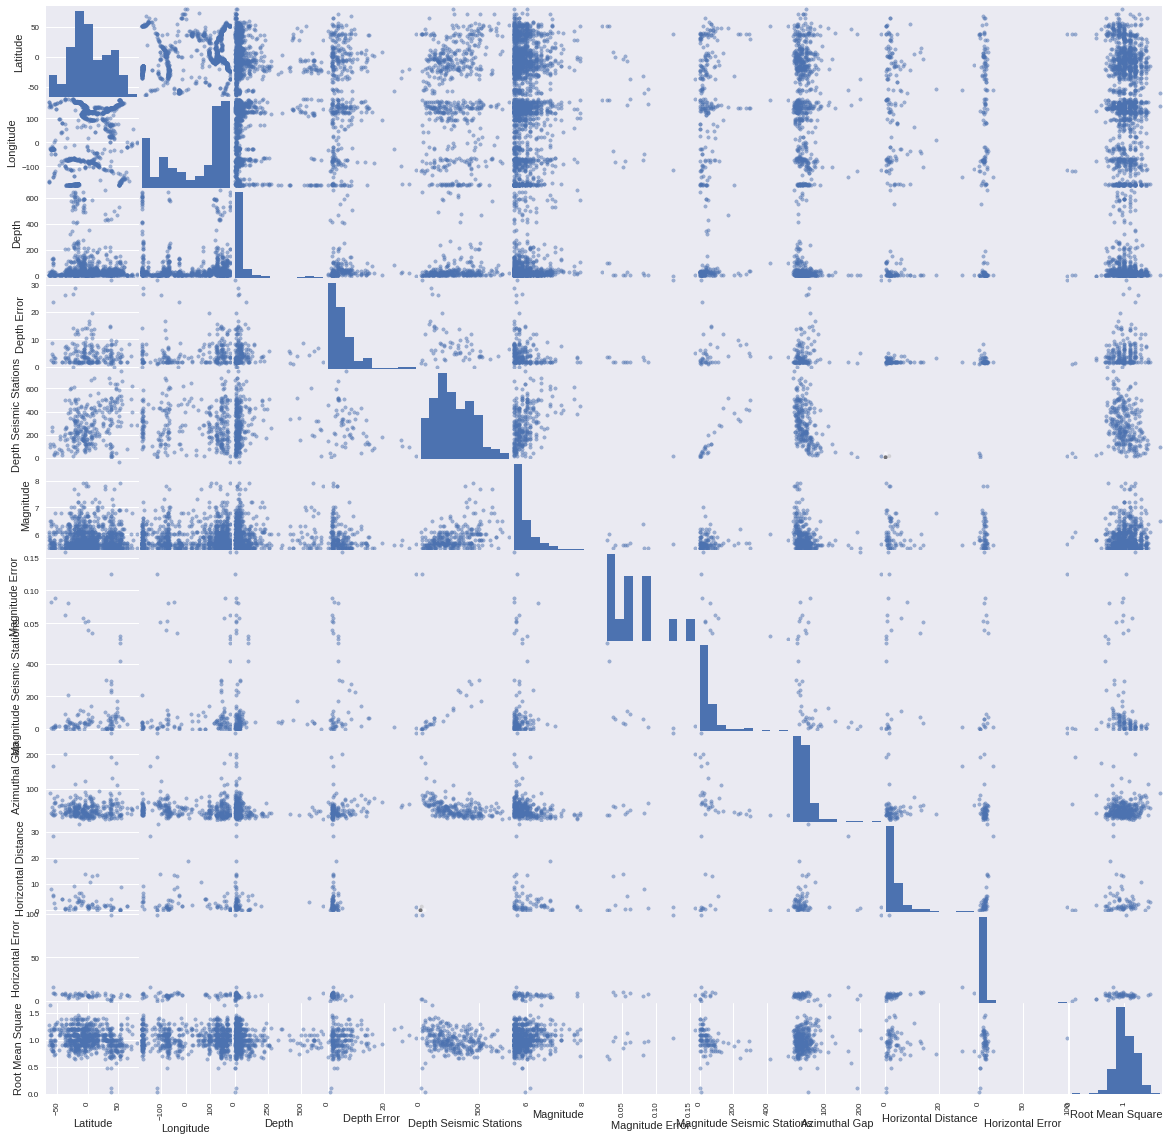

In [21]:
pd.scatter_matrix(earthquake_sample, figsize=(20,20));

#### The multiple regression, OLS, and scatter matrix all shows no linear correlation making any relationship hard to point out using these methods

## Hypothesis test

#### state null and alternative

$H_0: \mu = 5.5$  
$H_a: \mu < 5.5$  

#### pick a significant level

0.05

#### calculate test stats

#### compute p-value

In [71]:
earthquake_sample_t_statistic, earthquake_sample_two_tailed_p_value = ttest_1samp(earthquake_sample['Magnitude'], 5.5)
print(f't-test statistic: {earthquake_sample_t_statistic:.4}')

lower_p_value = earthquake_sample_two_tailed_p_value / 2
print(f'p-value: {lower_p_value:.3}')

t-test statistic: 29.36
p-value: 2.06e-137


#### decision (reject of fail to reject)

fail to reject because the p-value is lower then 0.05

### Summery

#### currently there are no know ways to predict earthquakes magnitude. The methods used above show a good sample of how statisticians, scienctist will approach this problem


### Google Maps with the earthquake population plotted

#### https://support.google.com/fusiontables/answer/2571232
#### https://fusiontables.google.com/data?docid=1xGrpP6nIFl_PG5SOG-MtnvhzsNVc_ijSZ9VpYLRx#map:id=3

In [21]:
earthquake_map = folium.Map(location=[0, 0], zoom_start=2, control_scale= True)


In [38]:
marker_cluster = folium.MarkerCluster('Earthquake Location Points').add_to(earthquake_map)
marker_cluster

In [39]:
for each in earthquakes.iterrows():
    market_cluster(list[each[1]['Latitude'],each[1]['Longitude']]),
    

NameError: name 'market_cluster' is not defined